# In this notebook we change the user written reviews into 0 (negative), 1 (neutral) or 2 (positive) according to the sentiment of the review.

## Read general reviews DataFrame

In [1]:
import pandas as pd

path = 'TransformedData/'
fn_reviews = path + 'df_reviews.csv'

df_reviews = pd.read_csv(fn_reviews)
df_reviews

,user_id,user_url,steam_id
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,76561197970982479
1,js41637,http://steamcommunity.com/id/js41637,76561198035864385
2,evcentric,http://steamcommunity.com/id/evcentric,76561198007712555
3,doctr,http://steamcommunity.com/id/doctr,76561198002099482
4,maplemage,http://steamcommunity.com/id/maplemage,76561198026584251
...,...,...,...
25481,76561198306599751,http://steamcommunity.com/profiles/76561198306...,76561198306599751
25482,Ghoustik,http://steamcommunity.com/id/Ghoustik,76561198308105615
25483,76561198310819422,http://steamcommunity.com/profiles/76561198310...,76561198310819422
25484,76561198312638244,http://steamcommunity.com/profiles/76561198312...,76561198312638244


## Function to generate sentiment analysis

In [2]:
from deep_translator import GoogleTranslator
from textblob import TextBlob

def sa(intext):
    s = TextBlob(intext).sentiment.polarity
    if s == 0:
        s = TextBlob(GoogleTranslator(source='auto', target='en').translate(intext)).sentiment.polarity
        return(s)
    else:
        return(s)

## Read Reviews and pass them through the fucntion.

In [3]:
SIDs = df_reviews['steam_id'].values
i = 1
n = len(SIDs)
for sid in SIDs:
    print(i/n*100)
    i += 1
    fn_reviews_i = path + 'ReviewsData/revData_' + str(sid) + '.csv'
    try:
        df_reviews_i = pd.read_csv(fn_reviews_i)
        Ri = len(df_reviews_i)
        sa_reviews_i = []
        for ri in range(Ri):
            review_ri = df_reviews_i['review'][ri]
            s = sa(review_ri)
            if s > 0.1:
                sa_reviews_i.append(2)
            elif s < -0.1:
                sa_reviews_i.append(0)
            else:
                sa_reviews_i.append(1)
        df_reviews_i['sentiment_analysis'] = sa_reviews_i
        df_reviews_i.drop(columns='review',inplace=True)
        fn_reviews_f = 'featEngData/' + 'ReviewsData/revData_' + str(sid) + '.csv'
        df_reviews_i.to_csv(fn_reviews_f,index=False)
    except:
        pass

0.003923722828219414
0.007847445656438828
0.011771168484658244
0.015694891312877657
0.019618614141097074
0.02354233696931649
0.027466059797535903
0.031389782625755314
0.03531350545397473
0.03923722828219415
0.043160951110413556
0.04708467393863298
0.05100839676685239
0.054932119595071806
0.05885584242329123
0.06277956525151063
0.06670328807973004
0.07062701090794946
0.07455073373616888
0.0784744565643883
0.08239817939260771
0.08632190222082711
0.09024562504904653
0.09416934787726595
0.09809307070548536
0.10201679353370478
0.10594051636192418
0.10986423919014361
0.11378796201836303
0.11771168484658245
0.12163540767480185
0.12555913050302125
0.12948285333124068
0.13340657615946008
0.1373302989876795
0.1412540218158989
0.14517774464411834
0.14910146747233777
0.15302519030055717
0.1569489131287766
0.160872635956996
0.16479635878521542
0.16872008161343482
0.17264380444165423
0.17656752726987365
0.18049125009809305
0.18441497292631248
0.1883386957545319
0.1922624185827513
0.1961861414109707


## Check if makes sense

In [4]:
import pandas as pd
path = 'TransformedData/'
fn_reviews = path + 'df_reviews.csv'

df_reviews = pd.read_csv(fn_reviews)
df_reviews

,user_id,user_url,steam_id
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,76561197970982479
1,js41637,http://steamcommunity.com/id/js41637,76561198035864385
2,evcentric,http://steamcommunity.com/id/evcentric,76561198007712555
3,doctr,http://steamcommunity.com/id/doctr,76561198002099482
4,maplemage,http://steamcommunity.com/id/maplemage,76561198026584251
...,...,...,...
25481,76561198306599751,http://steamcommunity.com/profiles/76561198306...,76561198306599751
25482,Ghoustik,http://steamcommunity.com/id/Ghoustik,76561198308105615
25483,76561198310819422,http://steamcommunity.com/profiles/76561198310...,76561198310819422
25484,76561198312638244,http://steamcommunity.com/profiles/76561198312...,76561198312638244


In [5]:
SIDs = df_reviews['steam_id'].values
sa = []
count = 0
for sid in SIDs:
    fn_reviews_i = 'FeatEngData/' + 'ReviewsData/revData_' + str(sid) + '.csv'
    try:
        df_reviews_i = pd.read_csv(fn_reviews_i)
        sa = sa + list(df_reviews_i['sentiment_analysis'].values)
    except:
        count+=1

(array([ 8520., 21223., 27940.]),
 array([0.        , 0.66666667, 1.33333333, 2.        ]),
 <BarContainer object of 3 artists>)

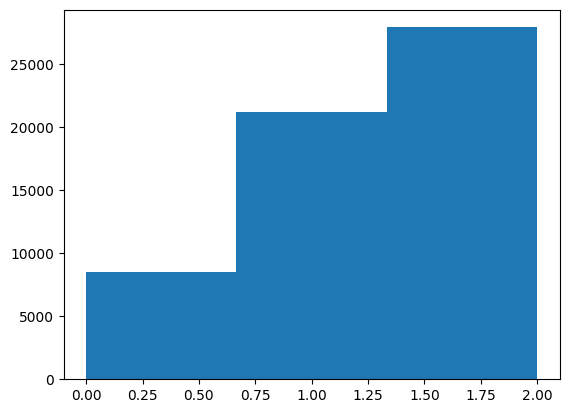

In [6]:
import matplotlib.pyplot as plt
plt.hist(sa,3)